<center><h1>FINAL PROJECT 2</h1></center><break><center><h2>LOGISTIC REGRESSION & SVM</h2></center><break><center><h3>KELAS PYTN-10</h3></center>

<p><h3><b>Kelompok 1 :</b></h3></p>
<ol>
    <li>ELSA INDRIANI</li>
    <li>FELIS TIGRIS HAFIZULLOH</li>
    <li>HANI NAFISAH AMALIYA</li>
</ol>

<h1><b>Objektif</b></h1>
<p>Final Project 2 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:</p>
<ul>
    <li>Mampu memahami konsep Classification dengan Logistic Regression dan SVM</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM</li>
    <li>Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi</li>
</ul>

<h1><b>Project Overview</b></h1>
<p>Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia diwebsite kaggle, untuk mendapatkan dataset dapat ditemukan melalui link klik disini. Dataset ini memiliki 23 atribut yang berisi informasi mengenai record data hujan harian selama 10 tahun di Australia. Obejktif yang ingin dicapai dari penelitian ini adalah untuk memprediksi cuaca apakah hari selanjutnya hujan atau tidak dengan mengimplementasikan analisa prediction menggunakan algoritma Logistic Regression dan Support Vector Machine (SVM). Sebelum melakukan modeling perlu dilakukan processing data agar model prediksi yang dihasilkan memiliki tingkat akurasi yang optimal.</p>

<h1><b>Attribute Information:</b></h1>
<ol>
    <li>Date - tanggal hari itu</li>
    <li>Location - lokasi, nama kota di Australia
    <li>MinTemp - temperatur terendah hari itu dalam celcius
    <li>MaxTemp - temperatur tertinggi hari itu dalam celcius
    <li>Rainfall - jumlah curah hujan hari itu dalam mm
    <li>Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
    <li>Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
    <li>WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
    <li>WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
    <li>WindDir9am - arah angin jam 9 pagi
    <li>WindDir3pm - arah angin jam 3 sore
    <li>WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
    <li>rata-rata kecepatan angin 10 menit sebelum jam 3 sore
    <li>WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
    <li>Humidity9am - humiditas jam 9 pagi dalam persen
    <li>Humidity3pm - humiditas jam 3 sore dalam persen
    <li>Pressure9am - tekanan udara jam 9 pagi dalam hpa
    <li>Pressure3pm - tekanan udara jam 3 sore dalam hpa
    <li>Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit 1⁄8, menghitung berapa unit 1⁄8 dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
    <li>Cloud3pm - persentase langit yang tertutup awan jam 3 sore
    <li>Temp9am - temperatur jam 9 pagi dalam celcius
    <li>Temp3pm - temperatur jam 3 sore dalam celcius
    <li>RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
    <li>RainTomorrow - variable yang mau di prediksi
</ol>

### Import Library yang Diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import metrics
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

### Menampilkan dataset

In [2]:
df = pd.read_csv("weatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Missing value pada dataset ini sangat banyak khususnya pada atribut target yaitu RainTomorrow, missing value pada kolom tersebut bisa langsung di drop karena jika tidak dihapus atau diisi dengan metode seperti mean/median akan menimbulkan bias pada hasil prediksi.

### Pembersihan Data

In [6]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

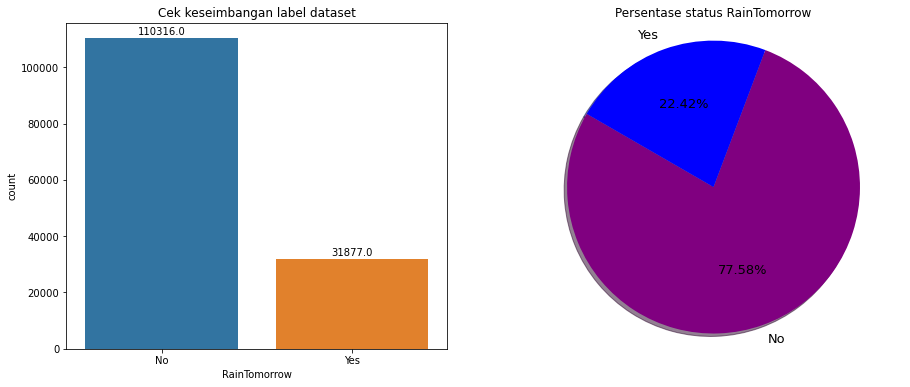

In [8]:
# Cek Keseimbangan jumlah data pada atribut target
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Cek keseimbangan label dataset")
ax = sns.countplot(x='RainTomorrow', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
plt.subplot(122)
plt.title("Persentase status RainTomorrow")
rainTomorrow_values_count = df['RainTomorrow'].value_counts()
rainTomorrow_size = rainTomorrow_values_count.values.tolist()
rainTomorrow_labels = 'No', 'Yes'
colors=['purple', 'blue']
pcs, texts, autotexts = plt.pie(rainTomorrow_size, labels=rainTomorrow_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

Dari visualisasi diatas dapat dilihat bahwa jumlah data pada variabel target (RainTomorrow) terdapat perbedaan jumlah yang cukup besar. Dimana jumlah data 'No' sebesar 110316 dengan persentase 77.58% sedangkan jumlah data 'Yes' hanya sebesar 31877 dengan persentase dari keseluruhan data sebesar 22.42%. Hal ini menunjukkan bahwa data tersebut mengalami imbalanced data atau data tidak seimbang. 

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

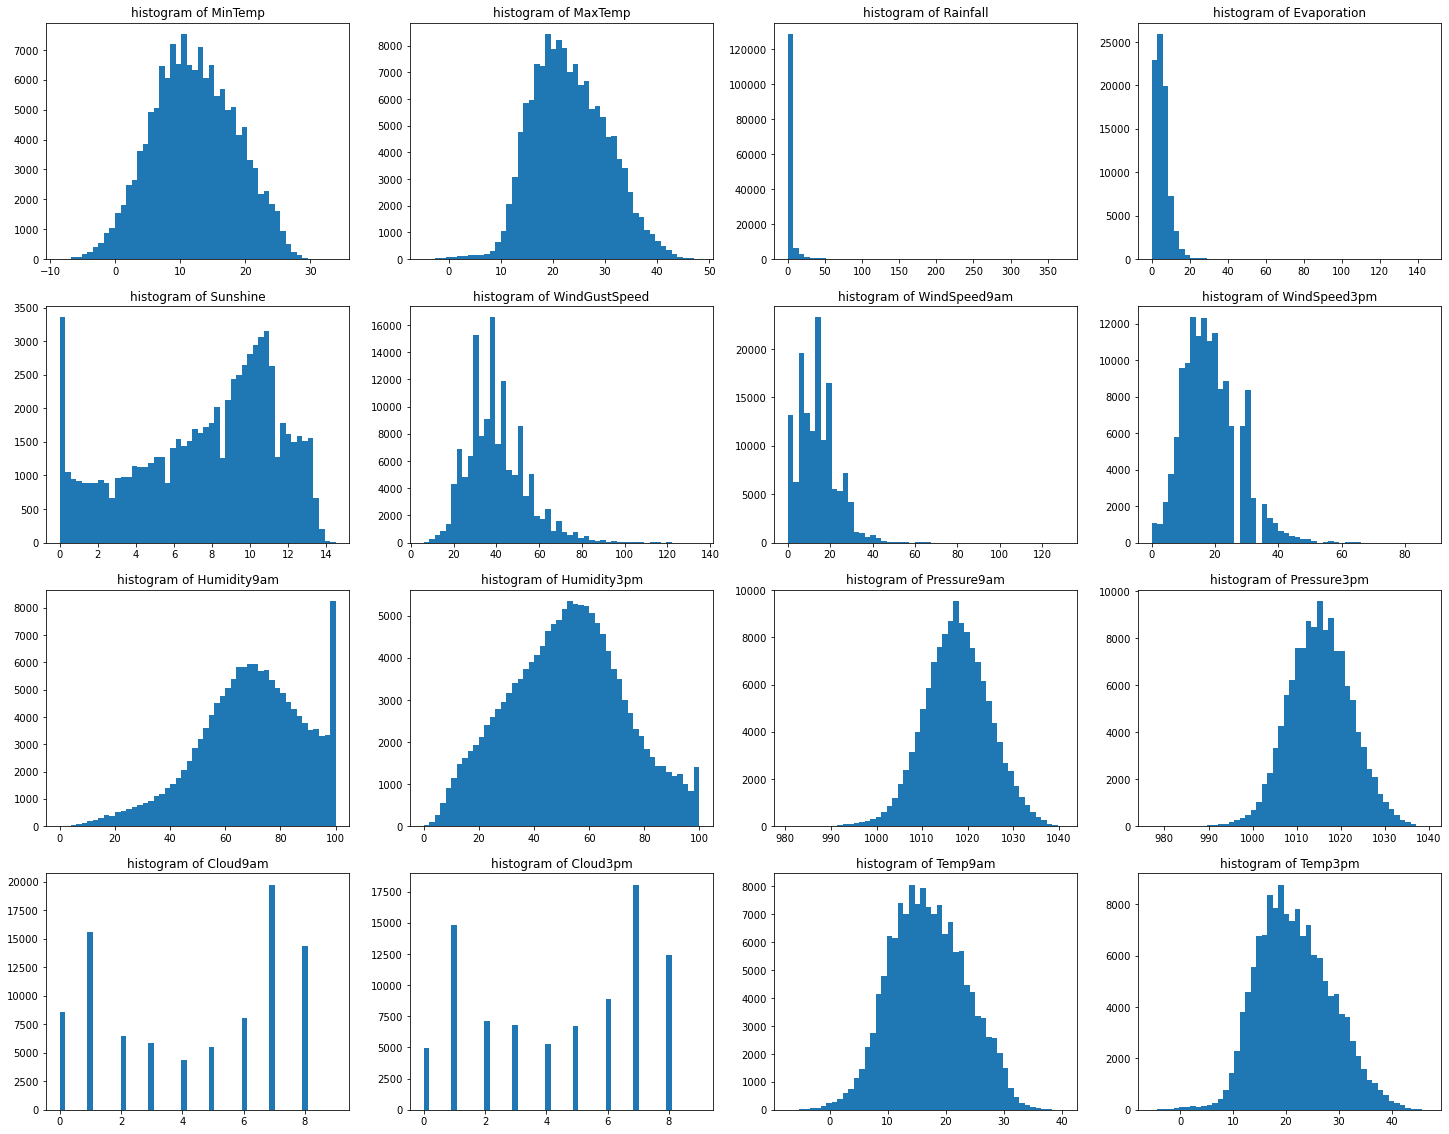

In [10]:
# Numeric columns exploration
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustSpeed',
                   'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 
                    'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
fig, ax = plt.subplots(4,4, sharex=False, sharey=False, figsize=(25,20))
count = 0
for num_col in num_cols:
    ax_x = count//4
    ax_y = count%4
    
    ax[ax_x, ax_y].hist(df[num_col], bins=50)
    ax[ax_x, ax_y].set_title(f"histogram of {num_col}")
    count+=1
plt.show()


Data yang memiliki distribusi normal yaitu MinTemp, MaxTemp, Humadity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm

#### Korelasi antar fitur Sunshine dengan fitur Rainfall dan fitur Sunshine dengan fitur Evaporation

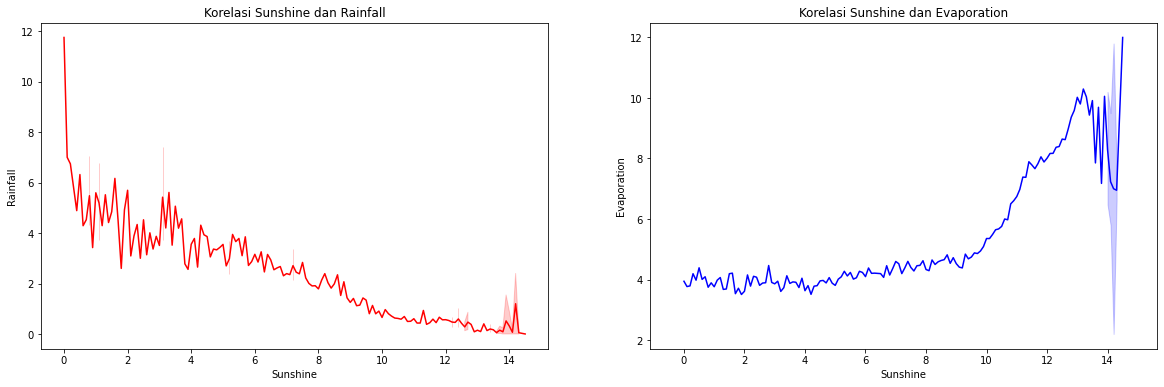

In [11]:
plt.rcParams['figure.figsize']=(20,6)
plt.subplot(121)
plt.title("Korelasi Sunshine dan Rainfall")
sns.lineplot(data=df, x='Sunshine',y='Rainfall', color='red')

plt.subplot(122)
plt.title("Korelasi Sunshine dan Evaporation")
sns.lineplot(data=df, x='Sunshine', y='Evaporation', color='blue')
plt.axis('equal')
plt.show()

Dapat dilihat bahwa Sunshine berbanding terbalik dengan Rainfall, semakin rendah nilai sunshine semakin tinggi nilai Rainfall dan sebaliknya. sedangkan korelasi antara Sunshine berbanding lurus dengan Evaporation (penguapan), semakin tinggi nilai Sunshine semakin tinggi pula nilai Evaporation.

#### Kota dengan hari yang mengalami hujan paling banyak

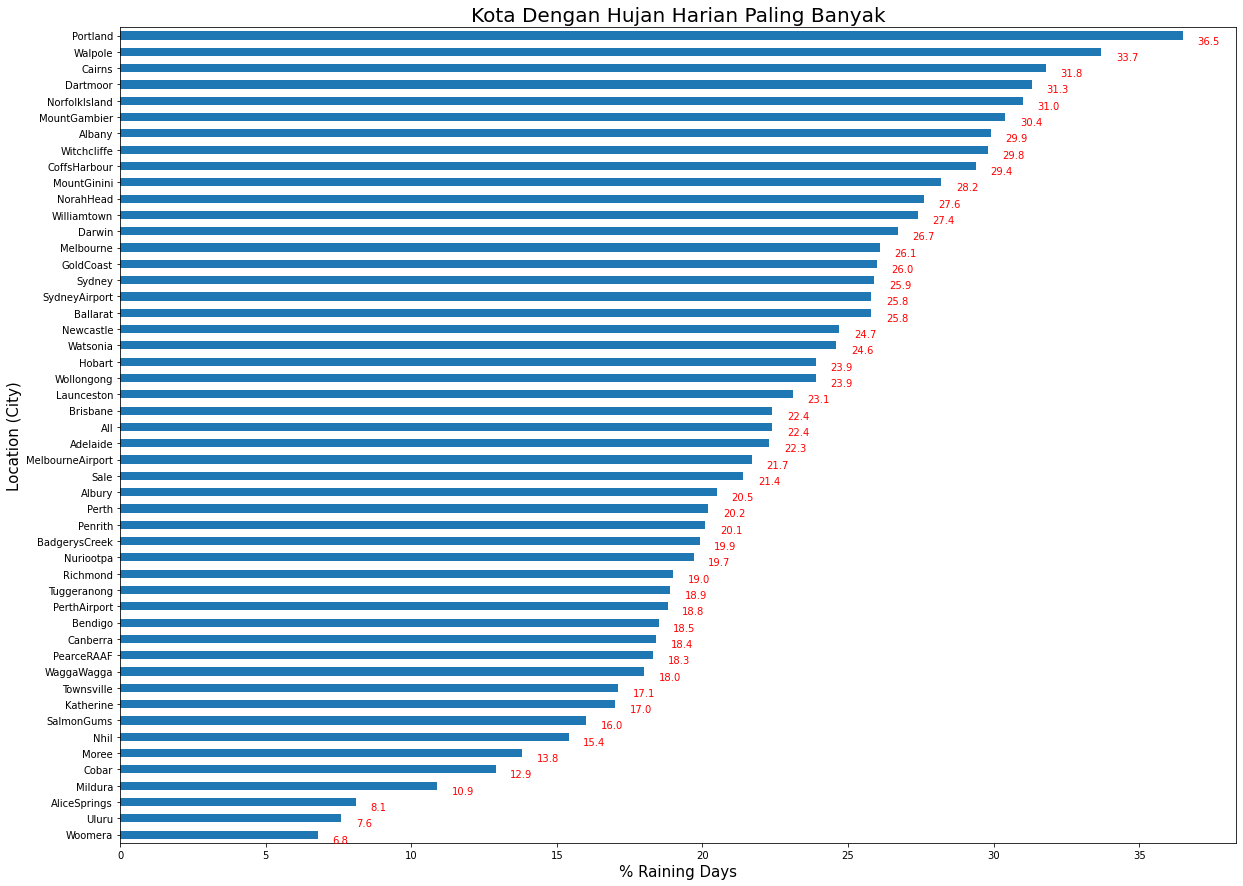

In [12]:
location_rain = pd.crosstab(index=df['Location'], columns=df['RainTomorrow'], values=df['RainTomorrow'],
                           aggfunc='count', margins=True)
location_rain['% Yes'] = (location_rain['Yes']/location_rain['All']).round(3)*100
fig, ax = plt.subplots(figsize=(20,15))
location_rain['% Yes'].sort_values().plot(kind='barh')
ax.set_xlabel("% Raining Days", fontsize=15)
ax.set_ylabel("Location (City)", fontsize=15)
ax.set_title("Kota Dengan Hujan Harian Paling Banyak", fontsize=20)
y = location_rain['% Yes'].sort_values().values
for k,v in enumerate(y):
    ax.text(v+0.5 , k-0.5 , round(float(v),1), color='red')

#### Korelasi antara Humidity3pm dan Temp3pm terhadap prediksi hujan hari setelahnya (RainTomorrow)

In [14]:
px.scatter(df.sample(5000), x='Temp3pm', y='Humidity3pm',
           title="Humadity (3PM) vs Temperature (3PM)",color='RainTomorrow')


- Jika hari ini (3PM) temperatur tinggi dan Kelembapan (Humadity) rendah, kemungkinan untuk turun hujan pada hari setelahnya memiliki probabilitas yang rendah.
- Jika temperatur hari ini (3PM) rendah dan kelembapan hari ini (3PM) tinggi, kemungkinan hari besoknya akan turun hujan memiliki probabilitas yang cukup tinggi.

In [13]:
px.scatter(df, title="Temperature (3PM) vs Rain Tomorrow",
          x="Temp3pm",color='RainTomorrow')

visualisasi diatas menunjukkan distribusi data normal, ketika temperatur lebih rendah kemungkinan untuk hari berikutnya mengalami hujan cukup tinggi. fitur Temp3pm merupakan salah satu fitur yang cukup vital dalam menentukan apakah hari selanjutnya mengalami hujan atau tidak

#### cek dan isi Missing Value

In [14]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['Column'])
missing_values['%'] = (df.isna().sum()/142193)*100
missing_values

Column          %
Sunshine        67816  47.692924
Evaporation     60843  42.789026
Cloud3pm        57094  40.152469
Cloud9am        53657  37.735332
Pressure9am     14014   9.855619
Pressure3pm     13981   9.832411
WindDir9am      10013   7.041838
WindGustDir      9330   6.561504
WindGustSpeed    9270   6.519308
WindDir3pm       3778   2.656952
Humidity3pm      3610   2.538803
Temp3pm          2726   1.917113
WindSpeed3pm     2630   1.849599
Humidity9am      1774   1.247600
Rainfall         1406   0.988797
RainToday        1406   0.988797
WindSpeed9am     1348   0.948007
Temp9am           904   0.635756
MinTemp           637   0.447983
MaxTemp           322   0.226453
Location            0   0.000000
RainTomorrow        0   0.000000
Date                0   0.000000

In [15]:
# isi missing value dengan mean untuk data yang bertipe numerical dan mode untuk data yang bertipe categorical
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
print(f"Numerical Columns : {num_cols}")
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
print("\n")
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(f"Categorical Column : {categorical_cols}")
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Numerical Columns : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Categorical Column : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Missing value sudah tidak ada

In [16]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
df.describe().T

count         mean        std    min          25%  \
MinTemp        142193.0    12.186400   6.388924   -8.5     7.600000   
MaxTemp        142193.0    23.226784   7.109554   -4.8    17.900000   
Rainfall       142193.0     2.349974   8.423217    0.0     0.000000   
Evaporation    142193.0     5.469824   3.168114    0.0     4.000000   
Sunshine       142193.0     7.624853   2.734927    0.0     7.624853   
WindGustSpeed  142193.0    39.984292  13.138385    6.0    31.000000   
WindSpeed9am   142193.0    14.001988   8.851082    0.0     7.000000   
WindSpeed3pm   142193.0    18.637576   8.721551    0.0    13.000000   
Humidity9am    142193.0    68.843810  18.932077    0.0    57.000000   
Humidity3pm    142193.0    51.482606  20.532065    0.0    37.000000   
Pressure9am    142193.0  1017.653758   6.746248  980.5  1013.500000   
Pressure3pm    142193.0  1015.258204   6.681788  977.1  1011.000000   
Cloud9am       142193.0     4.437189   2.278080    0.0     3.000000   
Cloud3pm       142193.0     4.503167   2.104709    0.0     4.000000   
Temp9am        142193.0    16.987509   6.472166   -7.2    12.300000   
Temp3pm        142193.0    21.687235   6.870771   -5.4    16.700000   

                       50%          75%     max  
MinTemp          12.000000    16.800000    33.9  
MaxTemp          22.700000    28.200000    48.1  
Rainfall          0.000000     0.800000   371.0  
Evaporation       5.469824     5.469824   145.0  
Sunshine          7.624853     8.700000    14.5  
WindGustSpeed    39.000000    46.000000   135.0  
WindSpeed9am     13.000000    19.000000   130.0  
WindSpeed3pm     18.637576    24.000000    87.0  
Humidity9am      70.000000    83.000000   100.0  
Humidity3pm      51.482606    65.000000   100.0  
Pressure9am    1017.653758  1021.800000  1041.0  
Pressure3pm    1015.258204  1019.400000  1039.6  
Cloud9am          4.437189     6.000000     9.0  
Cloud3pm          4.503167     6.000000     9.0  
Temp9am          16.800000    21.500000    40.2  
Temp3pm          21.300000    26.300000    46.7

Hasil deskripsi statistik diatas dapat dilihat bahwa terdapat outlier yang cukup besar pada beberapa fitur seperti pada fitur Rainfall,evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm

- drop date karena pada dataset sudah ada fitur bulan dan
- drop location karena kita ingin model yang akan diciptakan untuk global

In [18]:
df.drop(columns=['Date','Location'], axis=1, inplace=True)
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6     5.469824  7.624853           W   
1      7.4     25.1       0.0     5.469824  7.624853         WNW   
2     12.9     25.7       0.0     5.469824  7.624853         WSW   
3      9.2     28.0       0.0     5.469824  7.624853          NE   
4     17.5     32.3       1.0     5.469824  7.624853           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          W        WNW          20.0  ...         71.0   
1           44.0        NNW        WSW           4.0  ...         44.0   
2           46.0          W        WSW          19.0  ...         38.0   
3           24.0         SE          E          11.0  ...         45.0   
4           41.0        ENE         NW           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1  8.000000  4.503167     16.9   
1         25.0       1010.6       1007.8  4.437189  4.503167     17.2   
2         30.0       1007.6       1008.7  4.437189  2.000000     21.0   
3         16.0       1017.6       1012.8  4.437189  4.503167     18.1   
4         33.0       1010.8       1006.0  7.000000  8.000000     17.8   

   Temp3pm  RainToday RainTomorrow  
0     21.8         No           No  
1     24.3         No           No  
2     23.2         No           No  
3     26.5         No           No  
4     29.7         No           No  

[5 rows x 21 columns]

#### Checking Outliers menggunakan visualisasi boxplot

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


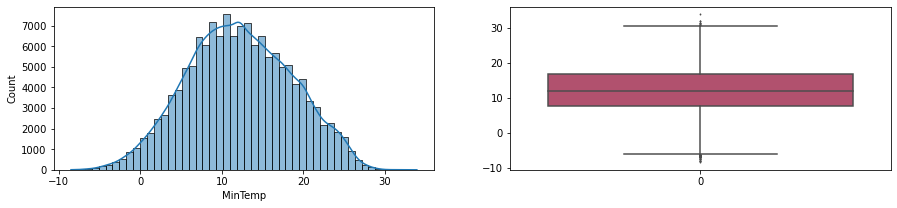

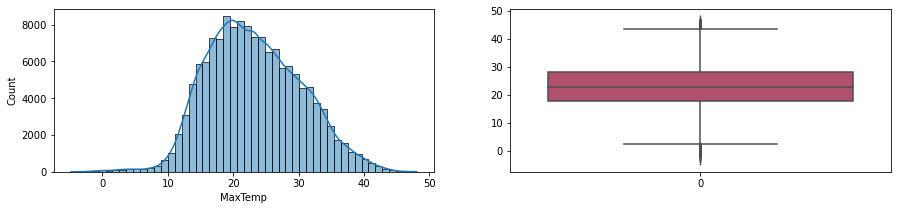

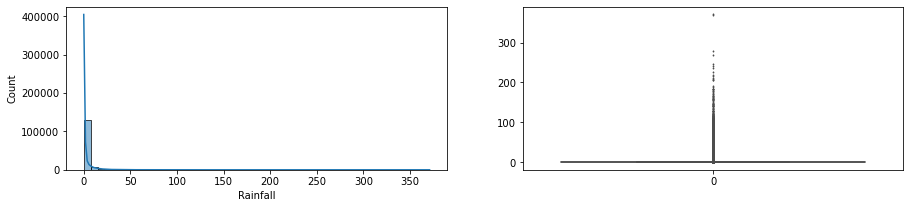

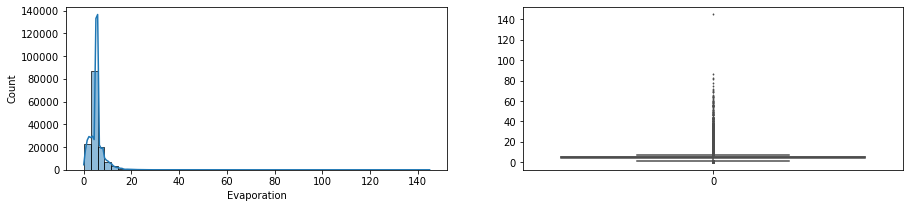

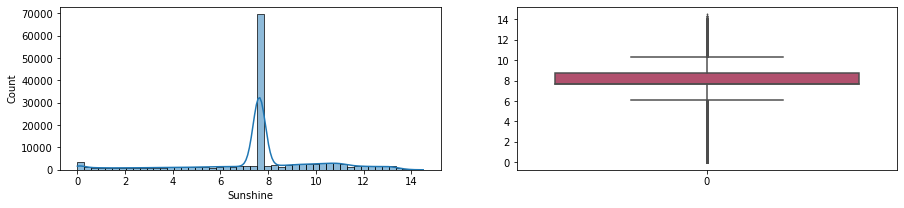

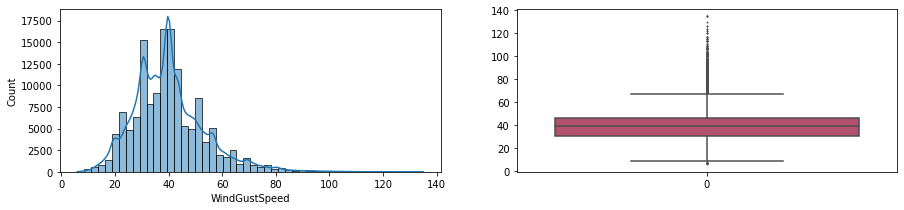

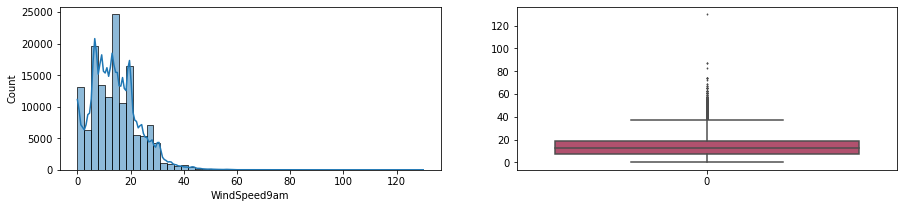

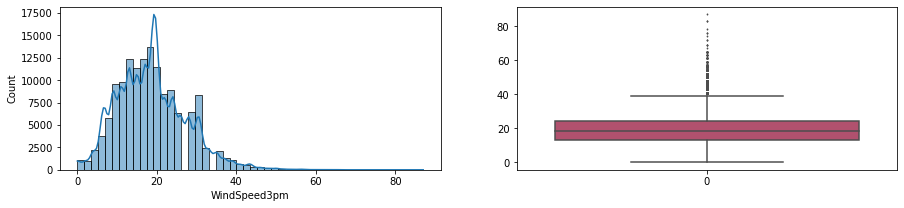

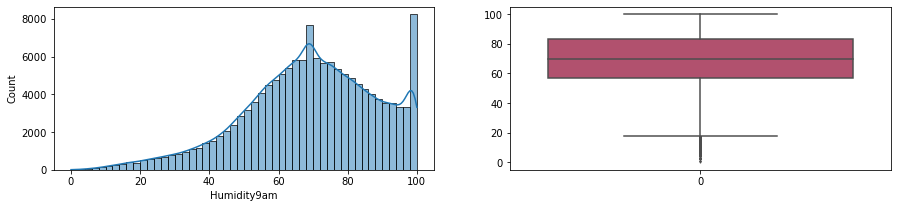

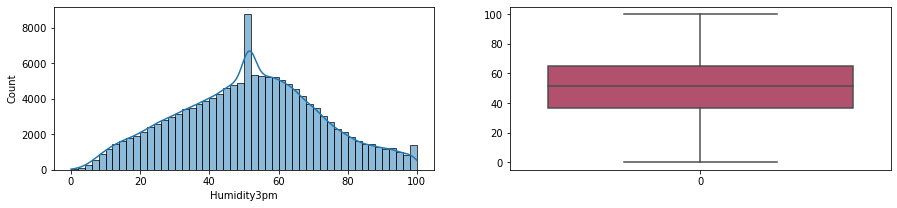

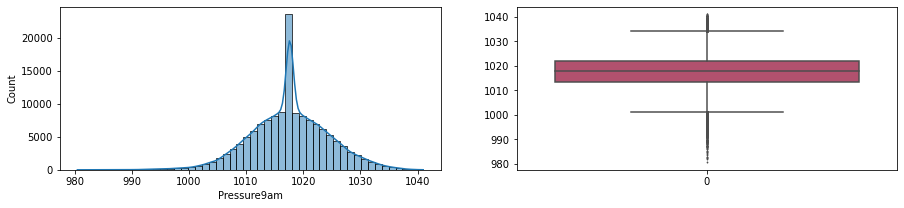

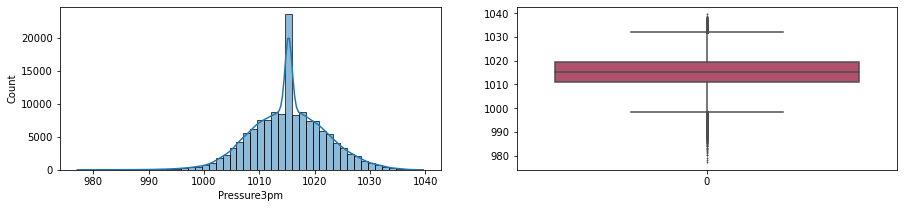

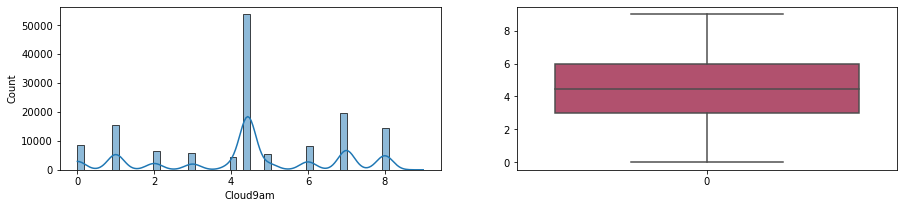

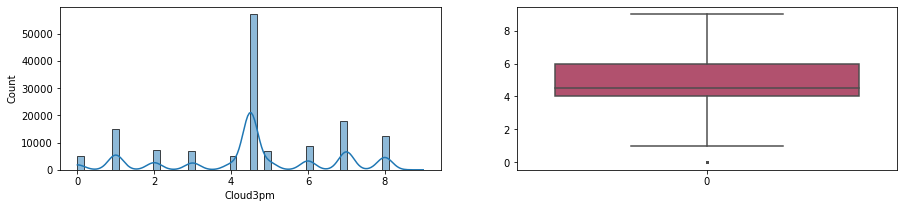

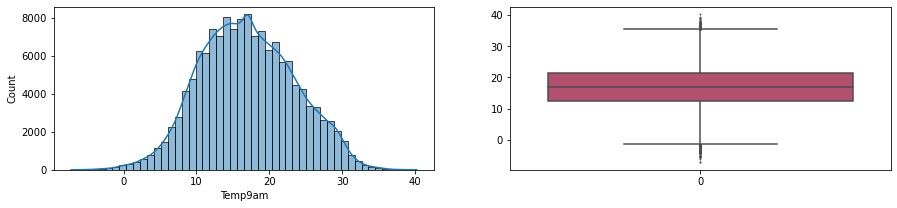

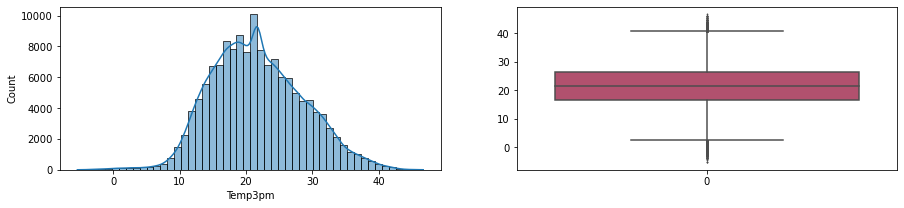

In [19]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)
for i in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(15,3))
    sns.histplot(df[i],bins=50,kde=True, ax=ax[0])
    sns.boxplot(data=df[i], ax=ax[1],palette='flare', fliersize=1)

Distribusi data dari fitur Rainfall terlihat memiliki distorsi data yang besar, lebih baik drop fitur ini

In [20]:
df.drop("Rainfall", axis=1, inplace=True)
df.head()

MinTemp  MaxTemp  Evaporation  Sunshine WindGustDir  WindGustSpeed  \
0     13.4     22.9     5.469824  7.624853           W           44.0   
1      7.4     25.1     5.469824  7.624853         WNW           44.0   
2     12.9     25.7     5.469824  7.624853         WSW           46.0   
3      9.2     28.0     5.469824  7.624853          NE           24.0   
4     17.5     32.3     5.469824  7.624853           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0       1007.7       1007.1  8.000000  4.503167     16.9     21.8        No   
1       1010.6       1007.8  4.437189  4.503167     17.2     24.3        No   
2       1007.6       1008.7  4.437189  2.000000     21.0     23.2        No   
3       1017.6       1012.8  4.437189  4.503167     18.1     26.5        No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

#### cek nilai Outliers

In [21]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
def RemoveOutliers(num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(num_cols)

nilai outlier pada fitur MinTemp : <-6.2 atau >30.6
nilai outlier pada fitur MaxTemp : <2.45 atau >43.65
nilai outlier pada fitur Evaporation : <1.8 atau >7.67
nilai outlier pada fitur Sunshine : <6.01 atau >10.31
nilai outlier pada fitur WindGustSpeed : <8.5 atau >68.5
nilai outlier pada fitur WindSpeed9am : <-11.0 atau >37.0
nilai outlier pada fitur WindSpeed3pm : <-3.5 atau >40.5
nilai outlier pada fitur Humidity9am : <18.0 atau >122.0
nilai outlier pada fitur Humidity3pm : <-5.0 atau >107.0
nilai outlier pada fitur Pressure9am : <1001.05 atau >1034.25
nilai outlier pada fitur Pressure3pm : <998.4 atau >1032.0
nilai outlier pada fitur Cloud9am : <-1.5 atau >10.5
nilai outlier pada fitur Cloud3pm : <1.0 atau >9.0
nilai outlier pada fitur Temp9am : <-1.5 atau >35.3
nilai outlier pada fitur Temp3pm : <2.3 atau >40.7


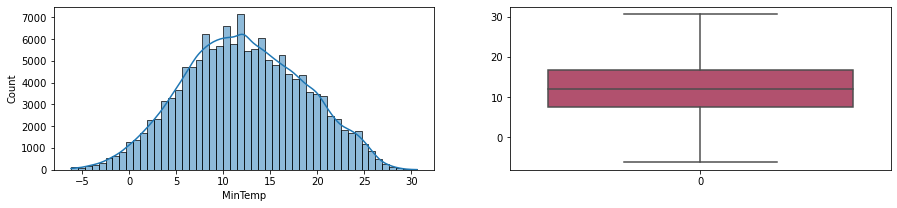

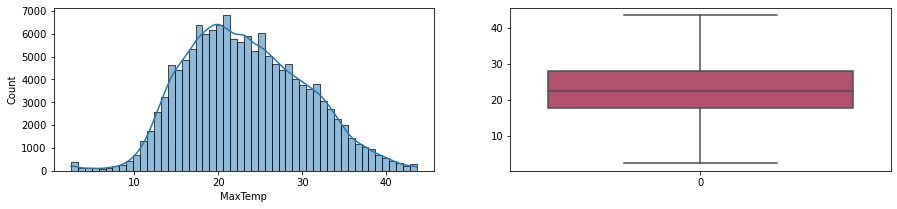

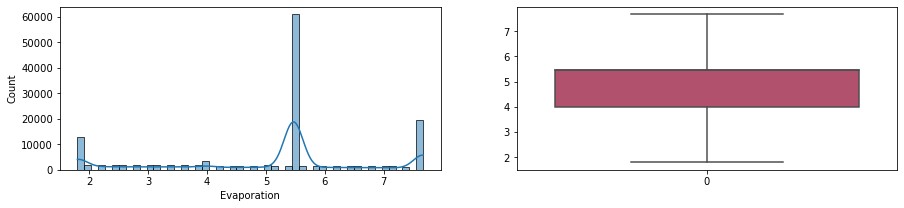

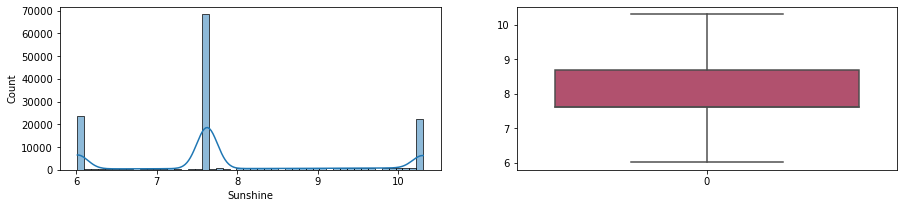

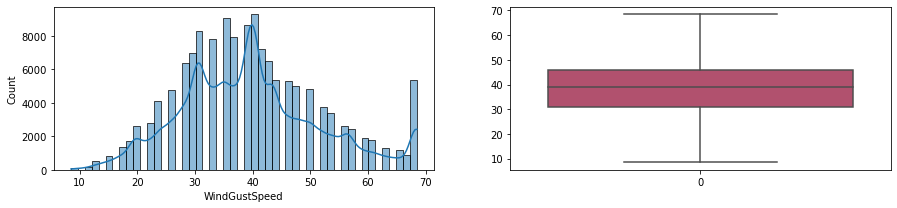

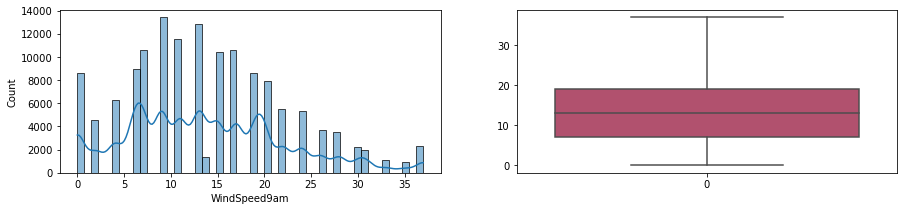

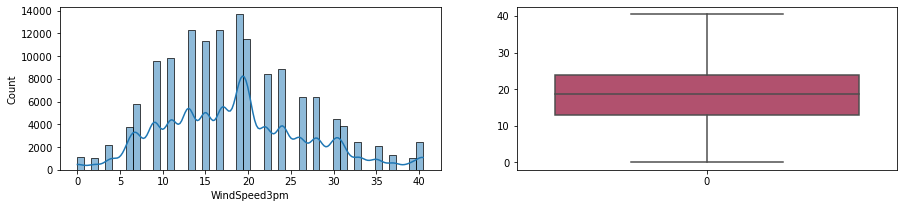

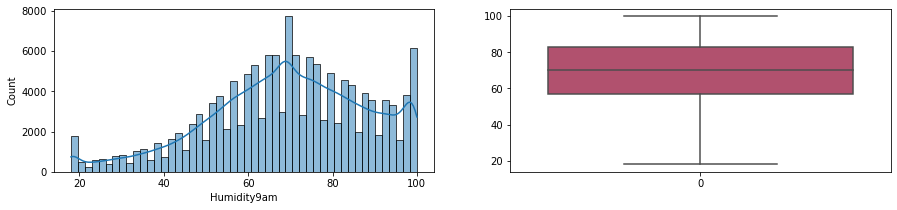

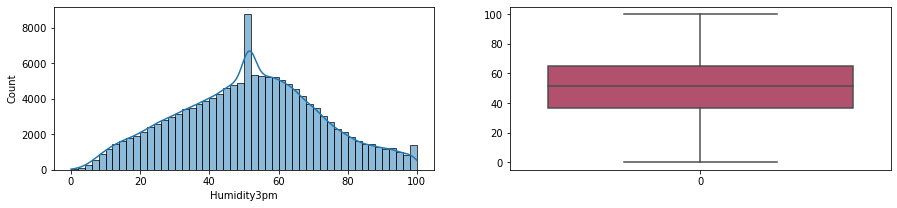

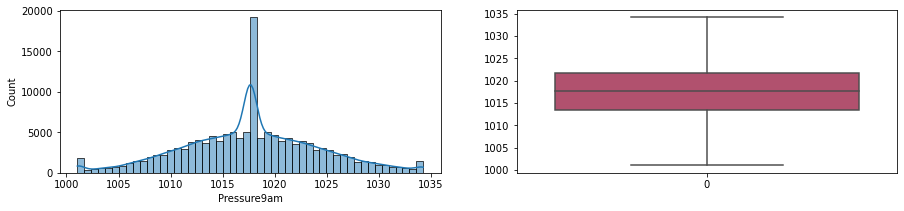

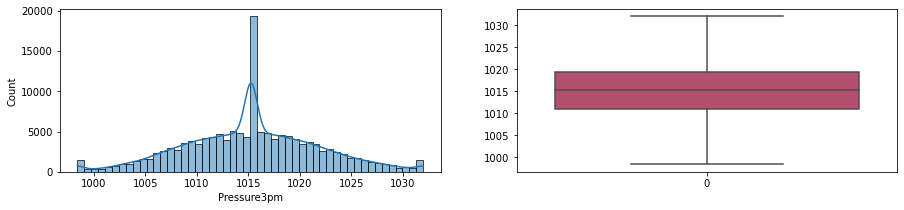

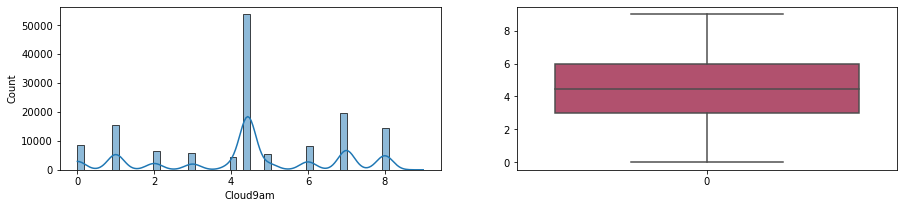

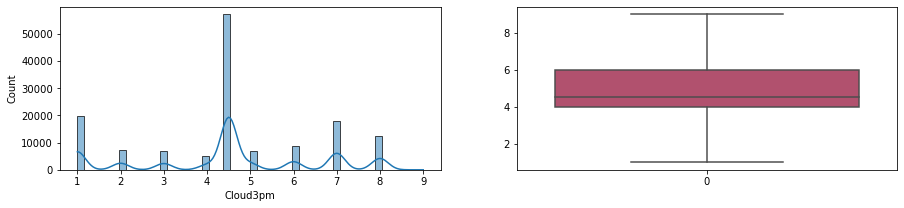

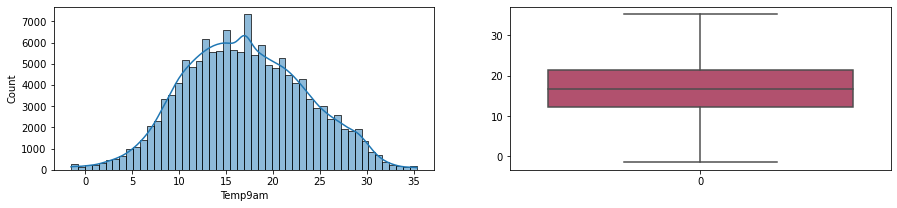

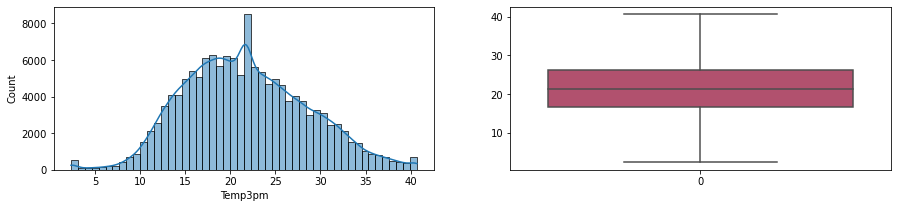

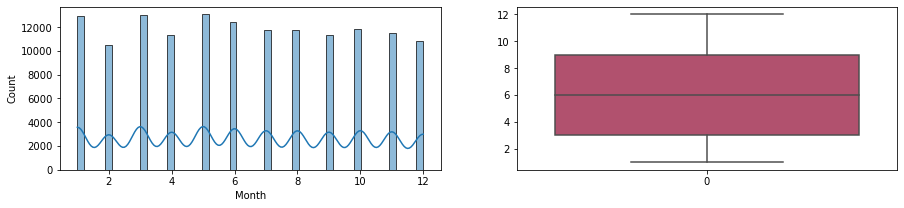

In [25]:
for i in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(15,3))
    sns.histplot(df[i],bins=50,kde=True, ax=ax[0])
    sns.boxplot(data=df[i], ax=ax[1],palette='flare', fliersize=1)

#### Data Preprocessing

In [22]:
# Binary encode untuk fitur RainToday dan RainTomorrow
df['RainToday'] = df['RainToday'].replace({'Yes':1,'No':0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes':1,'No':0})

In [23]:
#Encoding semua kolom bertipe cateogory dengan onehot encoder
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_cols)

['WindGustDir', 'WindDir9am', 'WindDir3pm']


In [24]:
#inisiasi OneHotEncoder dan menggabungkan original dataframe dengan kolom encode ke dataframe
for col in categorical_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        encoder_df.columns = encoder.get_feature_names_out([col])
        df = df.drop(col, axis=1)
        df = pd.concat([df, encoder_df], axis=1)


In [25]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir9am_nan', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE'

In [26]:
df

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0          13.4     22.9     5.469824  7.624853           44.0          20.0   
1           7.4     25.1     5.469824  7.624853           44.0           4.0   
2          12.9     25.7     5.469824  7.624853           46.0          19.0   
3           9.2     28.0     5.469824  7.624853           24.0          11.0   
4          17.5     32.3     5.469824  7.624853           41.0           7.0   
...         ...      ...          ...       ...            ...           ...   
145454      3.5     21.8     5.469824  7.624853           31.0          15.0   
145455      2.8     23.4     5.469824  7.624853           31.0          13.0   
145456      3.6     25.3     5.469824  7.624853           22.0          13.0   
145457      5.4     26.9     5.469824  7.624853           37.0           9.0   
145458      7.8     27.0     5.469824  7.624853           28.0          13.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  \
0               24.0         71.0         22.0       1007.7  ...   
1               22.0         44.0         25.0       1010.6  ...   
2               26.0         38.0         30.0       1007.6  ...   
3                9.0         45.0         16.0       1017.6  ...   
4               20.0         82.0         33.0       1010.8  ...   
...              ...          ...          ...          ...  ...   
145454          13.0         59.0         27.0       1024.7  ...   
145455          11.0         51.0         24.0       1024.6  ...   
145456           9.0         56.0         21.0       1023.5  ...   
145457           9.0         53.0         24.0       1021.0  ...   
145458           7.0         51.0         24.0       1019.4  ...   

        WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0                 0.0           0.0            0.0             0.0   
1                 0.0           0.0            0.0             0.0   
2                 0.0           0.0            0.0             0.0   
3                 0.0           0.0            0.0             0.0   
4                 1.0           0.0            0.0             0.0   
...               ...           ...            ...             ...   
145454            0.0           0.0            0.0             0.0   
145455            0.0           0.0            0.0             0.0   
145456            0.0           0.0            0.0             0.0   
145457            0.0           0.0            0.0             0.0   
145458            0.0           0.0            0.0             0.0   

        WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0                  0.0            0.0           0.0             1.0   
1                  0.0            0.0           0.0             0.0   
2                  0.0            0.0           0.0             0.0   
3                  0.0            0.0           0.0             0.0   
4                  0.0            0.0           0.0             0.0   
...                ...            ...           ...             ...   
145454             0.0            0.0           0.0             0.0   
145455             0.0            0.0           0.0             0.0   
145456             0.0            0.0           0.0             0.0   
145457             0.0            0.0           0.0             1.0   
145458             0.0            0.0           0.0             0.0   

        WindDir3pm_WSW  WindDir3pm_nan  
0                  0.0             0.0  
1                  1.0             0.0  
2                  1.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0  
...                ...             ...  
145454             0.0             0.0  
145455             0.0             0.0  
145456             0.0             0.0  
145457             0.0             0.0  
145458             0.0             0.0  

[145459 rows x 67 columns]

In [27]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['Column'])
missing_values['%'] = (df.isna().sum()/145459)*100
missing_values

Column         %
MinTemp            3266  2.245306
RainTomorrow       3266  2.245306
WindGustDir_W      3266  2.245306
WindGustDir_SW     3266  2.245306
WindGustDir_SSW    3266  2.245306
...                 ...       ...
WindDir3pm_N          0  0.000000
WindDir3pm_ESE        0  0.000000
WindDir3pm_ENE        0  0.000000
WindDir3pm_E          0  0.000000
WindDir3pm_nan        0  0.000000

[67 rows x 2 columns]

In [28]:
# isi missing value dengan mean untuk data yang bertipe numerical dan mode untuk data yang bertipe categorical
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
print(f"Numerical Columns : {num_cols}")
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
print("\n")

Numerical Columns : ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindD

In [29]:
df.isna().sum()

MinTemp           0
MaxTemp           0
Evaporation       0
Sunshine          0
WindGustSpeed     0
                 ..
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
WindDir3pm_nan    0
Length: 67, dtype: int64

In [31]:
cols = ['RainTomorrow','MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
        'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
        'RainToday']
new_data = df[cols]
new_data.head()

RainTomorrow  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  \
0           0.0     13.4     22.9     5.469824  7.624853           44.0   
1           0.0      7.4     25.1     5.469824  7.624853           44.0   
2           0.0     12.9     25.7     5.469824  7.624853           46.0   
3           0.0      9.2     28.0     5.469824  7.624853           24.0   
4           0.0     17.5     32.3     5.469824  7.624853           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  
0       1007.1  8.000000  4.503167     16.9     21.8        0.0  
1       1007.8  4.437189  4.503167     17.2     24.3        0.0  
2       1008.7  4.437189  2.000000     21.0     23.2        0.0  
3       1012.8  4.437189  4.503167     18.1     26.5        0.0  
4       1006.0  7.000000  8.000000     17.8     29.7        0.0

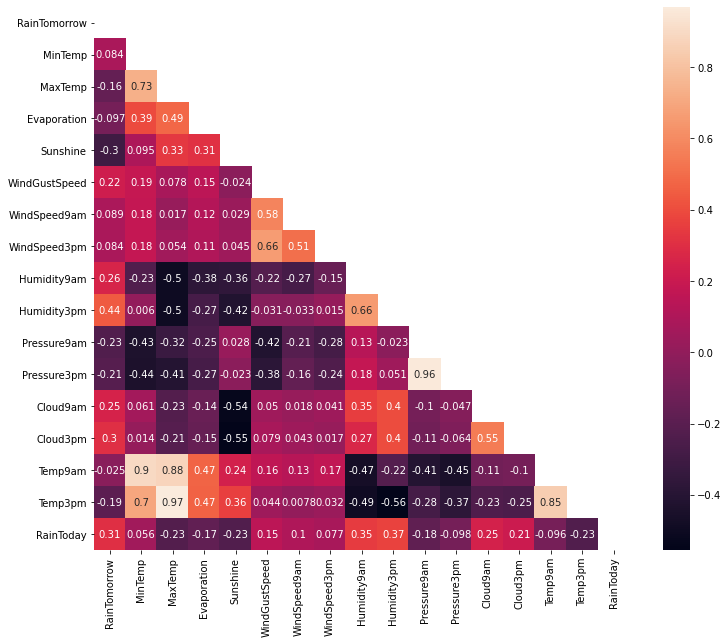

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

fitur 'MinTemp', 'MaxTemp','Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Month' memiliki korelasi yang cukup rendah terhadap Rain Tomorrow. lebih baik drop fitur ini

In [33]:
df.drop(columns=['MinTemp', 'MaxTemp','Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am'], axis=1, inplace=True)
df

Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  \
0       7.624853           44.0         71.0         22.0       1007.7   
1       7.624853           44.0         44.0         25.0       1010.6   
2       7.624853           46.0         38.0         30.0       1007.6   
3       7.624853           24.0         45.0         16.0       1017.6   
4       7.624853           41.0         82.0         33.0       1010.8   
...          ...            ...          ...          ...          ...   
145454  7.624853           31.0         59.0         27.0       1024.7   
145455  7.624853           31.0         51.0         24.0       1024.6   
145456  7.624853           22.0         56.0         21.0       1023.5   
145457  7.624853           37.0         53.0         24.0       1021.0   
145458  7.624853           28.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  ...  \
0            1007.1  8.000000  4.503167     21.8        0.0  ...   
1            1007.8  4.437189  4.503167     24.3        0.0  ...   
2            1008.7  4.437189  2.000000     23.2        0.0  ...   
3            1012.8  4.437189  4.503167     26.5        0.0  ...   
4            1006.0  7.000000  8.000000     29.7        0.0  ...   
...             ...       ...       ...      ...        ...  ...   
145454       1021.2  4.437189  4.503167     20.9        0.0  ...   
145455       1020.3  4.437189  4.503167     22.4        0.0  ...   
145456       1019.1  4.437189  4.503167     24.5        0.0  ...   
145457       1016.8  4.437189  4.503167     26.1        0.0  ...   
145458       1016.5  3.000000  2.000000     26.0        0.0  ...   

        WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0                 0.0           0.0            0.0             0.0   
1                 0.0           0.0            0.0             0.0   
2                 0.0           0.0            0.0             0.0   
3                 0.0           0.0            0.0             0.0   
4                 1.0           0.0            0.0             0.0   
...               ...           ...            ...             ...   
145454            0.0           0.0            0.0             0.0   
145455            0.0           0.0            0.0             0.0   
145456            0.0           0.0            0.0             0.0   
145457            0.0           0.0            0.0             0.0   
145458            0.0           0.0            0.0             0.0   

        WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0                  0.0            0.0           0.0             1.0   
1                  0.0            0.0           0.0             0.0   
2                  0.0            0.0           0.0             0.0   
3                  0.0            0.0           0.0             0.0   
4                  0.0            0.0           0.0             0.0   
...                ...            ...           ...             ...   
145454             0.0            0.0           0.0             0.0   
145455             0.0            0.0           0.0             0.0   
145456             0.0            0.0           0.0             0.0   
145457             0.0            0.0           0.0             1.0   
145458             0.0            0.0           0.0             0.0   

        WindDir3pm_WSW  WindDir3pm_nan  
0                  0.0             0.0  
1                  1.0             0.0  
2                  1.0             0.0  
3                  0.0             0.0  
4                  0.0             0.0  
...                ...             ...  
145454             0.0             0.0  
145455             0.0             0.0  
145456             0.0             0.0  
145457             0.0             0.0  
145458             0.0             0.0  

[145459 rows x 61 columns]

In [34]:
df.columns

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan', 'WindDir3pm_E',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
       'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
       'WindDir3

#### Cek Korelasi WinGustDir dengan RainTomorrow

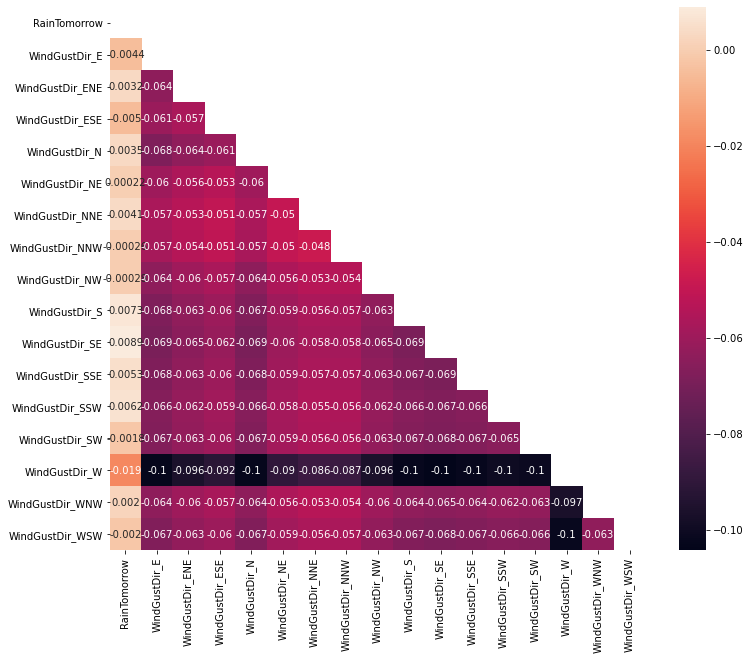

In [35]:
cols = ['RainTomorrow', 'WindGustDir_E','WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE','WindGustDir_SSE',
        'WindGustDir_SSW','WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW']
new_data = df[cols]
plt.figure(figsize=(12,10))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

Nilai korelasi fitur WindGustDir terhadap RainTomorrow sangat kecil(hampir mendekati 0), lebih baik drop fitur fitur tersebut

In [36]:
drop_cols = ['WindGustDir_E','WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE','WindGustDir_SSE',
        'WindGustDir_SSW','WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW']
df.drop(drop_cols, axis=1, inplace=True)
df.columns

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan', 'WindDir3pm_E',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
       'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan'],
      dtype='object')

#### Cek Korelasi Fitur WindDir9am Terhadap RainTomorrow

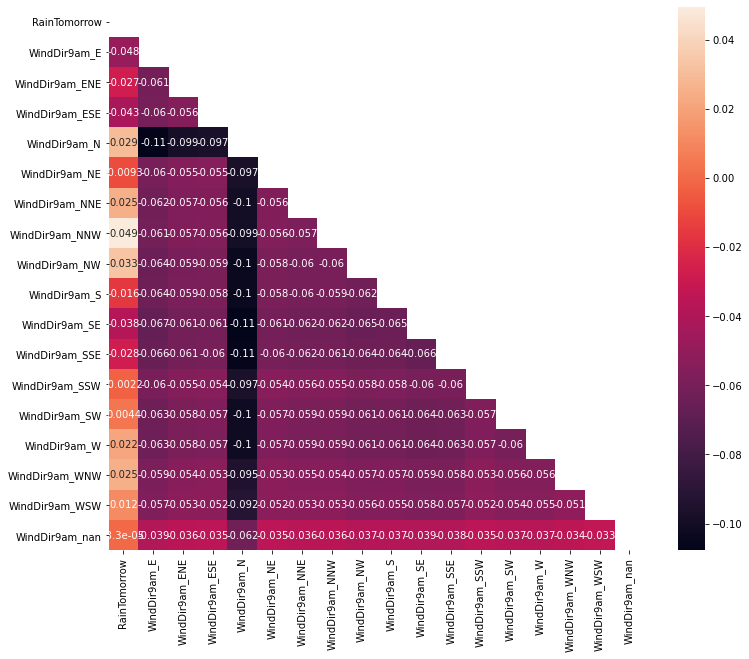

In [37]:
cols = ['RainTomorrow', 'WindDir9am_E','WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE',
       'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
        'WindDir9am_SSW', 'WindDir9am_SW','WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan']
new_data = df[cols]
plt.figure(figsize=(12,10))
sns.heatmap(new_data.corr(),annot=True, mask=np.triu(new_data.corr()))

#### Cek Korelasi Fitur WindDir3pm Terhadap RainTomorrow

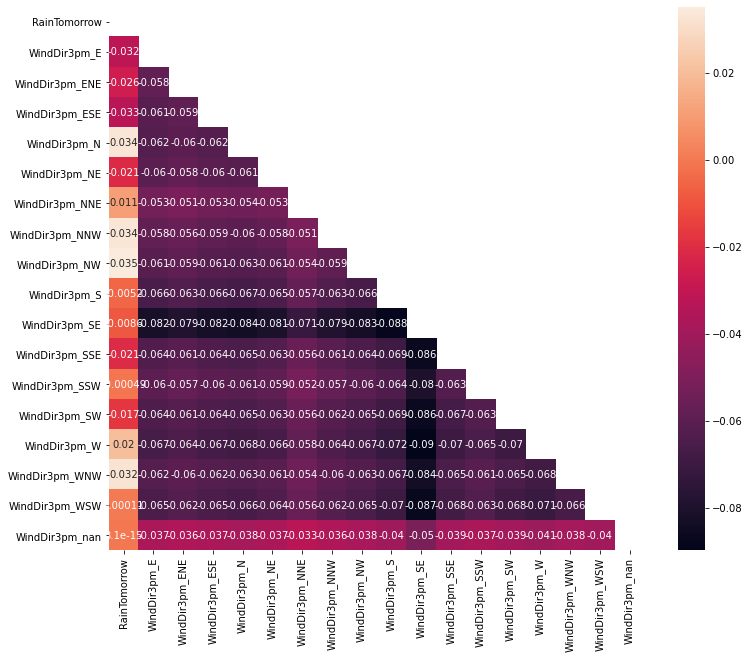

In [38]:
cols = ['RainTomorrow','WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'WindDir3pm_nan']
new_data = df[cols]
plt.figure(figsize=(12,10))
sns.heatmap(new_data.corr(),annot=True,mask=np.triu(new_data.corr()))

Fitur WindDir9pm juga terlihat memiliki korelasi yang lemah terhadap fitur RainTomorrow dengan rata rata nilai 0.0... drop fitur ini.

In [39]:
drop_cols = ['WindDir9am_E','WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE','WindDir9am_NNE',
             'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE','WindDir9am_SSW',
             'WindDir9am_SW','WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan','WindDir3pm_E',
             'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N','WindDir3pm_NE','WindDir3pm_NNE','WindDir3pm_NNW',
             'WindDir3pm_NW','WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW','WindDir3pm_SW',
             'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW','WindDir3pm_nan']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  \
0  7.624853           44.0         71.0         22.0       1007.7   
1  7.624853           44.0         44.0         25.0       1010.6   
2  7.624853           46.0         38.0         30.0       1007.6   
3  7.624853           24.0         45.0         16.0       1017.6   
4  7.624853           41.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  RainTomorrow  
0       1007.1  8.000000  4.503167     21.8        0.0           0.0  
1       1007.8  4.437189  4.503167     24.3        0.0           0.0  
2       1008.7  4.437189  2.000000     23.2        0.0           0.0  
3       1012.8  4.437189  4.503167     26.5        0.0           0.0  
4       1006.0  7.000000  8.000000     29.7        0.0           0.0

In [40]:
df.columns

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Sunshine
0.4863606879360188
WindGustSpeed
0.44869064943408815
Humidity9am
-0.4392860750301736
Humidity3pm
0.03536096185152833
Pressure9am
0.0077924269423353554
Pressure3pm
0.030475783059580975
Cloud9am
-0.28747776850395046
Cloud3pm
-0.17350040101639566
Temp3pm
0.25961592990415105


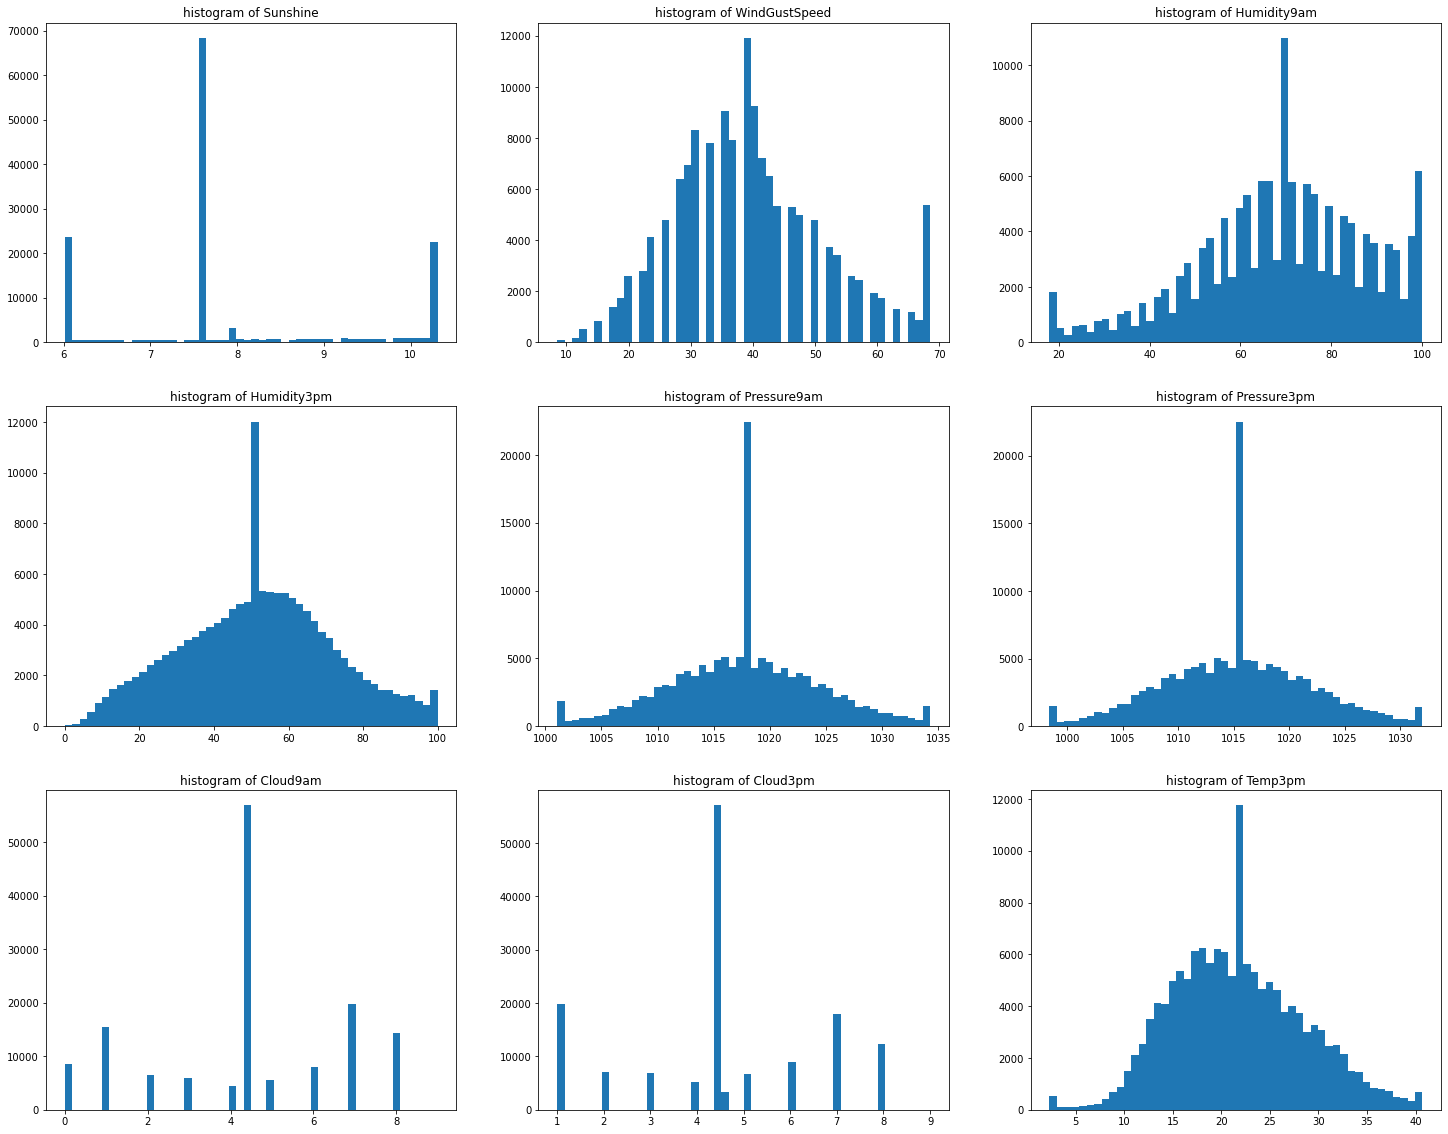

In [41]:
from scipy.stats import skew
cols = ['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 
        'Cloud9am', 'Cloud3pm', 'Temp3pm']
fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(25,20))
counts = 0
for col in cols:
    ax_x = counts//3
    ax_y = counts%3
    plt.title(f"skew of {col} : {skew(df[col])}")
    print(col)
    print(skew(df[col]))
    ax[ax_x, ax_y].hist(df[col],bins=50)
    ax[ax_x, ax_y].set_title(f"histogram of {col}")    
    counts+=1
plt.show()

aturan praktis skewness :

- cukup simetris (fairly symmetrical) : -0.5 to 0.5
- kemiringan sedang (moderate skewed) : -0.5 to -1.0 and 0.5 to 1.0
- kemiringan berat (highly skewed) : <-1.0 and > 1.0
Untuk skewness pada column diatas masih dalam range fairly symmterical jadi tidak perlu melakukan transformasi untuk normalisasi data.

In [42]:
df.columns

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

#### Splitting Data

In [43]:
y = df['RainTomorrow'].astype('int64') # variabel dependent atau target
X = df.drop(['RainTomorrow'], axis=1) # variabel independen atau fitur input

In [44]:
from collections import Counter
print("Before oversampling: ",Counter(y))

Before oversampling:  Counter({0: 113582, 1: 31877})


#### Splitting Data Training and Data Testing

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0 )

#### Scaling Data menggunakan MinMaxScaler

In [46]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

In [47]:
import os 
import pickle
scaler_path = 'scaler2.pkl'
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(mms, scaler_file)

#### Modeling

In [48]:
import time
start_time = time.time()
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
end_time = time.time()

Acc:  0.8444589577890829
[[21403  1320]
 [ 3205  3164]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22723
           1       0.71      0.50      0.58      6369

    accuracy                           0.84     29092
   macro avg       0.79      0.72      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [49]:
print("Time Taken to process: {}".format(end_time - start_time))

Time Taken to process: 1.4469869136810303


In [50]:
# check overfitting or under fitting
print("Train Data Score: {}".format(model.score(X_train, y_train)))
print("Test Data Score: {}".format(model.score(X_test, y_test)))

Train Data Score: 0.8448787027249993
Test Data Score: 0.8444589577890829


perbedaan score antaran hasil training dan hasil testing tidak terlalu jauh, akurasi normal

In [51]:
from sklearn import svm
start_time2 = time.time()
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))
end_time2 = time.time()

Acc:  0.8449401897428847
[[21569  1154]
 [ 3357  3012]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22723
           1       0.72      0.47      0.57      6369

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [52]:
print("Time Taken for process: {}".format(end_time2 - start_time2))

Time Taken for process: 426.421603679657


In [53]:
print("Train Data Score: {}".format(svm_model.score(X_train, y_train)))
print("Test Data Score: {}".format(svm_model.score(X_test, y_test)))

Train Data Score: 0.8448787027249993
Test Data Score: 0.8449401897428847


perbedaan score antaran hasil training dan hasil testing tidak terlalu jauh, akurasi normal

#### Percobaan correcting imbalanced dataset

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print("After oversampling: ",Counter(y_smote))
Xtrain_smote, Xtest_smote, ytrain_smote, ytest_smote = train_test_split(X_smote,y_smote,test_size=0.2, random_state=40 )
mms = MinMaxScaler()
Xtrain_smote = mms.fit_transform(Xtrain_smote)
Xtest_smote = mms.fit_transform(Xtest_smote)

After oversampling:  Counter({0: 113582, 1: 113582})


In [55]:
model_lr = LogisticRegression(solver='liblinear', random_state=1)
model_lr.fit(Xtrain_smote, ytrain_smote)
ypred_lr = model.predict(Xtest_smote)
print("Acc: ", metrics.accuracy_score(ytest_smote, ypred_lr))
print(metrics.confusion_matrix(ytest_smote, ypred_lr))
print(metrics.classification_report(ytest_smote, ypred_lr))

Acc:  0.7170118636233574
[[21468  1252]
 [11605 11108]]
              precision    recall  f1-score   support

           0       0.65      0.94      0.77     22720
           1       0.90      0.49      0.63     22713

    accuracy                           0.72     45433
   macro avg       0.77      0.72      0.70     45433
weighted avg       0.77      0.72      0.70     45433



In [56]:
from sklearn import svm
svm_model2 = svm.SVC(kernel='linear')
svm_model2.fit(Xtrain_smote, ytrain_smote)
ypred_svm=svm_model.predict(Xtest_smote)
print("Acc: ", metrics.accuracy_score(ytest_smote, ypred_svm))
print(metrics.confusion_matrix(ytest_smote, ypred_svm))
print(metrics.classification_report(ytest_smote, ypred_svm))

Acc:  0.7101886294103406
[[21599  1121]
 [12046 10667]]
              precision    recall  f1-score   support

           0       0.64      0.95      0.77     22720
           1       0.90      0.47      0.62     22713

    accuracy                           0.71     45433
   macro avg       0.77      0.71      0.69     45433
weighted avg       0.77      0.71      0.69     45433



#### Model Evaluasi

In [57]:
df

Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  \
0       7.624853           44.0         71.0         22.0       1007.7   
1       7.624853           44.0         44.0         25.0       1010.6   
2       7.624853           46.0         38.0         30.0       1007.6   
3       7.624853           24.0         45.0         16.0       1017.6   
4       7.624853           41.0         82.0         33.0       1010.8   
...          ...            ...          ...          ...          ...   
145454  7.624853           31.0         59.0         27.0       1024.7   
145455  7.624853           31.0         51.0         24.0       1024.6   
145456  7.624853           22.0         56.0         21.0       1023.5   
145457  7.624853           37.0         53.0         24.0       1021.0   
145458  7.624853           28.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  RainTomorrow  
0            1007.1  8.000000  4.503167     21.8        0.0           0.0  
1            1007.8  4.437189  4.503167     24.3        0.0           0.0  
2            1008.7  4.437189  2.000000     23.2        0.0           0.0  
3            1012.8  4.437189  4.503167     26.5        0.0           0.0  
4            1006.0  7.000000  8.000000     29.7        0.0           0.0  
...             ...       ...       ...      ...        ...           ...  
145454       1021.2  4.437189  4.503167     20.9        0.0           0.0  
145455       1020.3  4.437189  4.503167     22.4        0.0           0.0  
145456       1019.1  4.437189  4.503167     24.5        0.0           0.0  
145457       1016.8  4.437189  4.503167     26.1        0.0           0.0  
145458       1016.5  3.000000  2.000000     26.0        0.0           0.0  

[145459 rows x 11 columns]

In [58]:
df.loc[df['RainTomorrow']==1.0]

Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  \
8       7.624853           68.5         42.0          9.0      1008.90   
10      7.624853           30.0         48.0         22.0      1011.80   
11      7.624853           31.0         89.0         91.0      1010.50   
12      7.624853           61.0         76.0         93.0      1001.05   
16      7.624853           22.0         69.0         82.0      1012.20   
...          ...            ...          ...          ...          ...   
145324  7.624853           65.0         38.0         24.0      1007.00   
145390  7.624853           35.0         28.0         91.0      1015.90   
145391  7.624853           30.0         65.0         65.0      1016.90   
145392  7.624853           35.0         93.0         59.0      1018.10   
145393  7.624853           46.0        100.0         56.0      1020.00   

        Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  RainTomorrow  
8            1003.6  4.437189  4.503167     30.2        0.0           1.0  
10           1008.7  4.437189  4.503167     28.8        0.0           1.0  
11           1004.2  8.000000  8.000000     17.0        1.0           1.0  
12            998.4  8.000000  8.000000     15.8        1.0           1.0  
16           1010.4  8.000000  1.000000     18.1        0.0           1.0  
...             ...       ...       ...      ...        ...           ...  
145324       1003.6  4.437189  4.503167     36.6        0.0           1.0  
145390       1013.9  8.000000  8.000000     18.5        0.0           1.0  
145391       1015.3  3.000000  8.000000     21.2        1.0           1.0  
145392       1014.7  7.000000  8.000000     26.0        1.0           1.0  
145393       1015.8  8.000000  5.000000     26.9        1.0           1.0  

[31877 rows x 11 columns]

In [59]:
print(X_test)

[[1.         0.79166667 0.13414634 ... 0.14285714 0.88802083 0.        ]
 [0.375      0.375      0.92682927 ... 0.50045241 0.4140625  1.        ]
 [0.         0.50833333 0.46341463 ... 0.85714286 0.6015625  1.        ]
 ...
 [0.         1.         0.40243902 ... 0.14285714 0.2734375  0.        ]
 [0.29946309 0.725      0.68292683 ... 0.85714286 0.51822917 0.        ]
 [1.         0.725      0.65853659 ... 0.28571429 0.7890625  0.        ]]


In [60]:

model.predict(X_test[0:100])

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [61]:
svm_model.predict(X_test[0:100])

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [62]:
model.predict([[7.624853,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,21.8,0]])

array([0], dtype=int64)

In [63]:
svm_model.predict([[7.624853,44.0,71.0,22.0,1007.7,1007.1,8,4.503167,21.8,0]])

array([0], dtype=int64)

In [64]:
model.predict([[5.624853,78.5,42.0,9.0,1008.90,1003.6,9,9,50.2,0.0]])

array([0], dtype=int64)

In [65]:
svm_model.predict([[2.624853,78.5,42.0,9.0,1008.90,1003.6,9,9,50.2,0.0]])

array([0], dtype=int64)

In [66]:
# simpan model kedalam file dengan pickle
import pickle
pickle.dump(model, open('./lr_model_predict.pkl2','wb'))
pickle.dump(svm_model, open('./svm_model_predict2.pkl','wb'))

### Kesimpulan

Dataset ini memiliki dimensi yang cukup tinggi yaitu 145460 rows × 23 columns. Terdapat banyak missing value pada dataset ini, maka dari itu diperlukan proses pengisian data menggunakan metode mean untuk column tipe numeric dan metode mode untuk pengisian data yang bertipe categorical.Jumlah data pada variabel target (RainTomorrow) terdapat perbedaan jumlah yang cukup besar. Dimana jumlah data 'No' sebesar 110316 dengan persentase 77.58% sedangkan jumlah data 'Yes' hanya sebesar 31877 dengan persentase dari keseluruhan data sebesar 22.42%. korelasi antar fitur Sunshine berbanding terbalik dengan Rainfall, semakin rendah nilai sunshine semakin tinggi nilai Rainfall dan sebaliknya. sedangkan korelasi antara Sunshine berbanding lurus dengan Evaporation, semakin tinggi nilai Sunshine semakin tinggi pula nilai Evaporation. setelah melakukan seleksi fitur menggunakan visualisasi heatmap seaborn didapatkan fitur akhir yaitu 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday' dikarenakan memiliki pengaruh yang cukup tinggi terhadap RainTomorrow. Setelah dilakukan Training data dengan Logistic Regression dan SVM didapatkan untuk algoritma Logistic Regression menghasilkan score akurasi sebesar 0.84 dan untuk algoritma svm menghasilkan score akurasi sebesar 0.844. Akurasi dari kedua algoritma tidak mengalami overfitting maupun underfitting, dan akurasi dari kedua algoritma tidak jauh berbeda. Dikarenakan variabel target (RainTomorrow) memiliki perbedaan jumlah data yang cukup besar sehingga mengalami imbalance data, kami melakukan percobaan untuk handling imbalanced data menggunakan metode oversampling SMOTE. Tetapi akurasi yang dihasilkan mengalami penurunan drastis yaitu sekitar 0.60-0.69.